In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [34]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [35]:
def get_features_and_labels():
    datapd = load_breast_cancer()
    data = pd.DataFrame(datapd.data, columns=datapd.feature_names)
    
    X = data
    constants = [1 for i in range(X.shape[0])]
    X.insert(0, "Constants", constants)
    
    Y = datapd.target
    Y = Y.reshape([Y.shape[0],1])
    
    return X,Y

In [36]:
def split_data(X, Y, test_size):
    return train_test_split(X, Y, test_size=test_size)

In [37]:
def init_parameters(NUM_FEATURES):
    return np.zeros((NUM_FEATURES, 1))

In [38]:
def get_predictions(X, parameters):
    inter = np.matmul(X, parameters)
    return sigmoid(inter)

In [39]:
def cross_entropy_cost(Y_pred, Y_true):
    return -(((1 - Y_true) * np.log(1 - Y_pred)) + (Y_true * np.log(Y_pred))).sum()

In [40]:
def gradient_descent(parameters, X, Y, learning_rate, num_itr):
    
    Y_pred = get_predictions(X, parameters)
    jh = np.zeros((num_itr, 1))
    
    for i in range(num_itr):
        parameters = parameters - ((learning_rate / X.shape[0]) * (X.T @ (Y_pred - Y)))
        Y_pred = get_predictions(X, parameters)
        jh[i] = cross_entropy_cost(Y_pred, Y)
    
    plt.plot(range(len(jh)), jh, 'b')
    plt.title("Logistic Loss vs # of iterations")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()
    
    return parameters

In [41]:
X,Y = get_features_and_labels()
X_train, X_test, Y_train, Y_test = split_data(X, Y, 0.2)
parameters = init_parameters(X.shape[1])

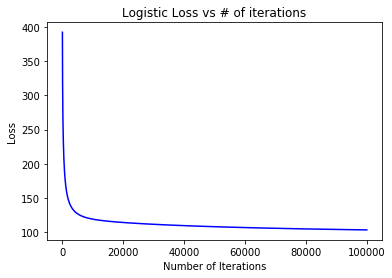

In [42]:
parameters = gradient_descent(parameters, X, Y, 0.000005, 100000)

In [44]:
cross_entropy_cost(get_predictions(X_test, parameters), Y_test)

22.34062433811504